In [53]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
data = pd.read_csv('Mall_Customers.csv')

In [54]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [55]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [56]:
#We need to analyse spemdng habits of customers based on annal income
df =data.iloc[:,[3,4]].values

In [57]:
#choosing k
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)


<function matplotlib.pyplot.show(close=None, block=None)>

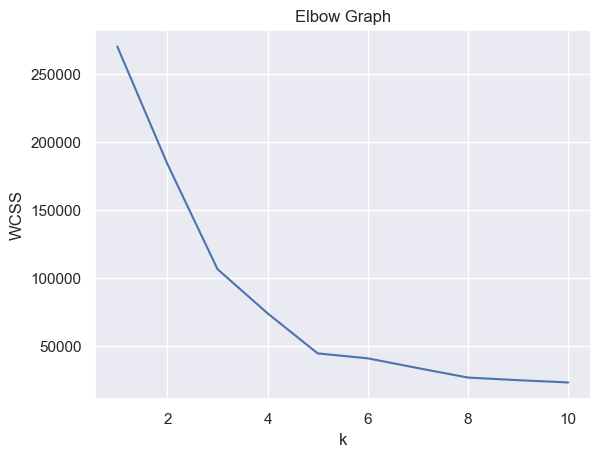

In [58]:
#elbow method
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show

In [59]:
#after 5 there is no significant drop so 5 is taken
#k=5

In [60]:
#Training
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
Y= kmeans.fit_predict(df)  #asign cluter number to which they belong
print(Y)


[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


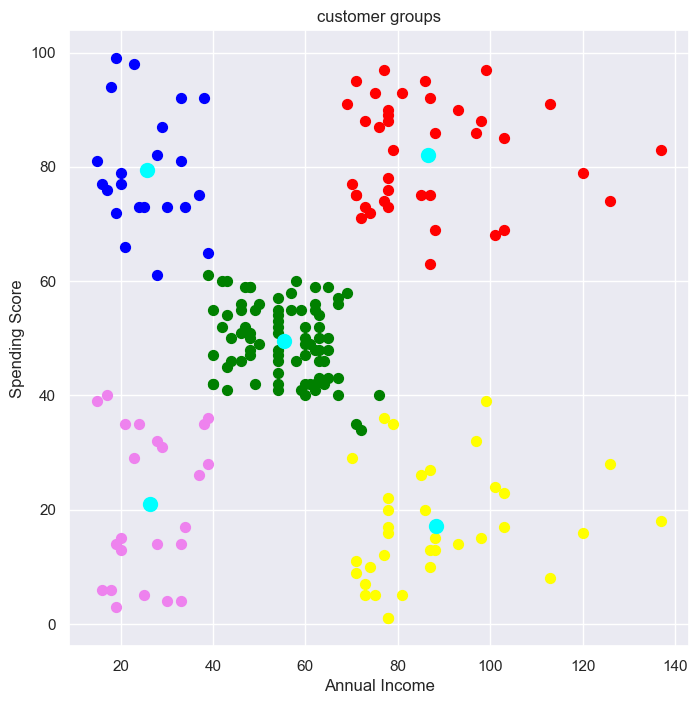

In [62]:
plt.figure(figsize=(8,8))

plt.scatter(df[Y==0,0],df[Y==0,1],s=50,c='green',label='Cluster1')
plt.scatter(df[Y==1,0],df[Y==1,1],s=50,c='red',label='Cluster2')
plt.scatter(df[Y==2,0],df[Y==2,1],s=50,c='yellow',label='Cluster3')
plt.scatter(df[Y==3,0],df[Y==3,1],s=50,c='violet',label='Cluster4')
plt.scatter(df[Y==4,0],df[Y==4,1],s=50,c='blue',label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,color='cyan',label='centroid') #s-size of dots center of col0 - x and center of col2 - y
plt.title('customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()